<a href="https://colab.research.google.com/github/robindang0573/AI-on-the-edge-device/blob/rolling/B%E1%BA%A3n_sao_c%E1%BB%A7a_NCKH1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NCKH/WL_vungtau.csv")
df['Time'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %H:%M')
# Xóa các hàng từ năm 2015 trở đi
df = df.loc[df['Time'].dt.year < 2015]
df

,Time,WL_vungtau
0,1988-01-01 00:00:00,0.36
1,1988-01-01 01:00:00,0.06
2,1988-01-01 02:00:00,-0.48
3,1988-01-01 03:00:00,-0.96
4,1988-01-01 04:00:00,-1.44
...,...,...
236683,2014-12-31 19:00:00,0.50
236684,2014-12-31 20:00:00,0.72
236685,2014-12-31 21:00:00,0.86
236686,2014-12-31 22:00:00,0.89


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/NCKH/WL_nhabe.csv")
df1

,Time,WL_nhabe
0,1/1/1988 0:00,0.85
1,1/1/1988 1:00,0.65
2,1/1/1988 2:00,0.29
3,1/1/1988 3:00,-0.22
4,1/1/1988 4:00,-0.67
...,...,...
245443,12/31/2015 19:00,0.00
245444,12/31/2015 20:00,0.00
245445,12/31/2015 21:00,0.00
245446,12/31/2015 22:00,0.00


In [ ]:
df.loc[:, 'WL_vungtau_lag1'] = df['WL_vungtau'].shift(1)
df.loc[:, 'WL_vungtau_lag2'] = df['WL_vungtau'].shift(2)
df.loc[:, 'WL_vungtau_lag3'] = df['WL_vungtau'].shift(3)

df.insert(2, 'WL_nhabe', df1.iloc[:, 1])

In [ ]:
df.head()

,Time,WL_vungtau,WL_nhabe,WL_vungtau_lag1,WL_vungtau_lag2,WL_vungtau_lag3
0,1988-01-01 00:00:00,0.36,0.85,NaN,NaN,NaN
1,1988-01-01 01:00:00,0.06,0.65,0.36,NaN,NaN
2,1988-01-01 02:00:00,-0.48,0.29,0.06,0.36,NaN
3,1988-01-01 03:00:00,-0.96,-0.22,-0.48,0.06,0.36
4,1988-01-01 04:00:00,-1.44,-0.67,-0.96,-0.48,0.06


Mean Squared Error XGB: 0.051778005198073816
Root Mean Squared Error: 0.22754780859870705


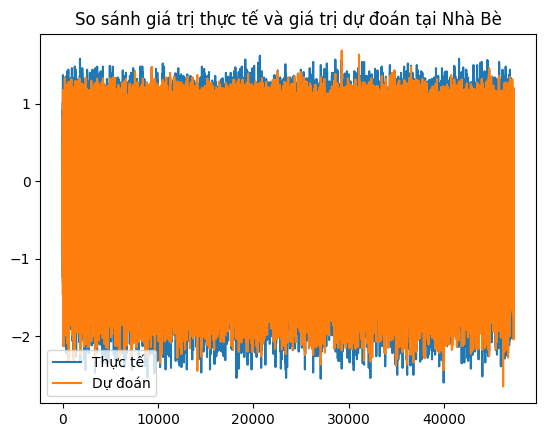

In [ ]:
#Dự đoán Nhà Bè
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle


# Chọn các cột đầu vào và đầu ra
X = df[['WL_vungtau','WL_vungtau_lag1', 'WL_vungtau_lag2', 'WL_vungtau_lag3']]
y = df['WL_nhabe']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình XGBoost với subsampling
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, subsample=0.8, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình bằng cách tính toán Mean Squared Error trên tập kiểm tra
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error XGB:', mse)

#Tính RMSE và đưa ra đánh giá mô hình
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)


# Vẽ biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán trên tập kiểm tra
plt.title('So sánh giá trị thực tế và giá trị dự đoán tại Nhà Bè')
plt.plot(y_test.values, label='Thực tế')
plt.plot(y_pred, label='Dự đoán')
plt.legend()
plt.show()

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/NCKH/WL_phuan.csv")
df2


,Time,WL_phuan
0,1/1/1988 0:00,0.83
1,1/1/1988 1:00,0.82
2,1/1/1988 2:00,0.63
3,1/1/1988 3:00,0.25
4,1/1/1988 4:00,-0.21
...,...,...
245443,12/31/2015 19:00,0.00
245444,12/31/2015 20:00,0.00
245445,12/31/2015 21:00,0.00
245446,12/31/2015 22:00,0.00


In [ ]:
df.loc[:, 'WL_nhabe_lag1'] = df1['WL_nhabe'].shift(1)
df.loc[:, 'WL_nhabe_lag2'] = df1['WL_nhabe'].shift(2)
df.loc[:, 'WL_nhabe_lag3'] = df1['WL_nhabe'].shift(3)

df.insert(2, 'WL_phuan', df2.iloc[:, 1])


In [ ]:
df

,Time,WL_vungtau,WL_phuan,WL_nhabe,WL_vungtau_lag1,WL_vungtau_lag2,WL_vungtau_lag3,WL_nhabe_lag1,WL_nhabe_lag2,WL_nhabe_lag3
0,1988-01-01 00:00:00,0.36,0.83,0.85,NaN,NaN,NaN,NaN,NaN,NaN
1,1988-01-01 01:00:00,0.06,0.82,0.65,0.36,NaN,NaN,0.85,NaN,NaN
2,1988-01-01 02:00:00,-0.48,0.63,0.29,0.06,0.36,NaN,0.65,0.85,NaN
3,1988-01-01 03:00:00,-0.96,0.25,-0.22,-0.48,0.06,0.36,0.29,0.65,0.85
4,1988-01-01 04:00:00,-1.44,-0.21,-0.67,-0.96,-0.48,0.06,-0.22,0.29,0.65
...,...,...,...,...,...,...,...,...,...,...
236683,2014-12-31 19:00:00,0.50,0.21,0.34,0.24,0.02,-0.14,0.10,0.00,0.02
236684,2014-12-31 20:00:00,0.72,0.52,0.66,0.50,0.24,0.02,0.34,0.10,0.00
236685,2014-12-31 21:00:00,0.86,0.83,0.92,0.72,0.50,0.24,0.66,0.34,0.10
236686,2014-12-31 22:00:00,0.89,1.06,1.12,0.86,0.72,0.50,0.92,0.66,0.34


Mean Squared Error XGB: 0.018991368134497862
Root Mean Squared Error: 0.13780917289679182


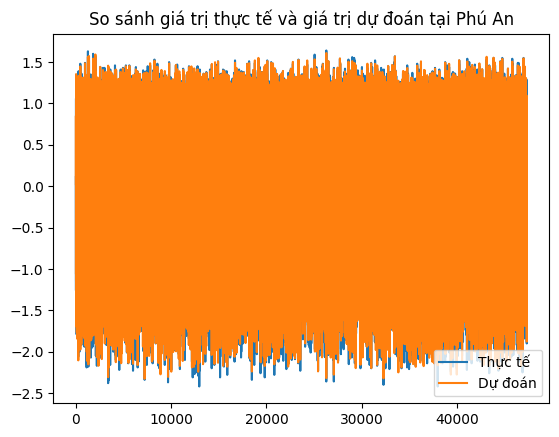

In [ ]:
#Dự đoán Phú An
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle

# Chọn các cột đầu vào và đầu ra
X = df[['WL_vungtau','WL_nhabe','WL_vungtau_lag1', 'WL_vungtau_lag2', 'WL_vungtau_lag3', 'WL_nhabe_lag1', 'WL_nhabe_lag2', 'WL_nhabe_lag3']]
y = df['WL_phuan']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình XGBoost với subsampling
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, subsample=0.8, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình bằng cách tính toán Mean Squared Error trên tập kiểm tra
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error XGB:', mse)

#Tính RMSE và đưa ra đánh giá mô hình
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)
# Vẽ biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán trên tập kiểm tra
plt.title('So sánh giá trị thực tế và giá trị dự đoán tại Phú An')
plt.plot(y_test.values, label='Thực tế')
plt.plot(y_pred, label='Dự đoán')
plt.legend()
plt.show()

In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/NCKH/WL_thudaumot.csv")
#df3

In [ ]:
df.loc[:, 'WL_phuan_lag1'] = df2['WL_phuan'].shift(1)
df.loc[:, 'WL_phuan_lag2'] = df2['WL_phuan'].shift(2)
df.loc[:, 'WL_phuan_lag3'] = df2['WL_phuan'].shift(3)

df.insert(2, 'WL_thudaumot', df3.iloc[:, 1])

Mean Squared Error XGB: 0.005146087836475083
Root Mean Squared Error: 0.07173623795875474


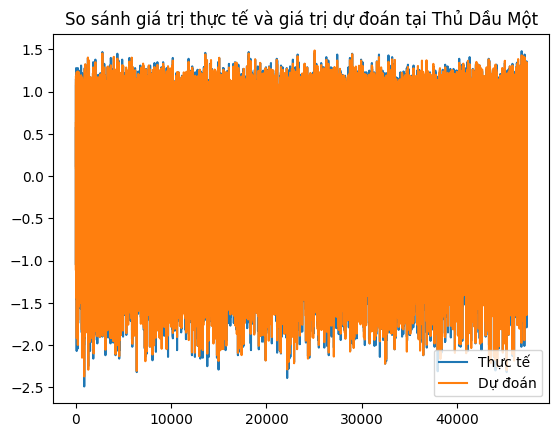

In [ ]:
#Dự đoán Thủ Dầu một
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle

# Chọn các cột đầu vào và đầu ra
X = df[['WL_vungtau','WL_nhabe','WL_phuan','WL_vungtau_lag1', 'WL_vungtau_lag2', 'WL_vungtau_lag3', 'WL_nhabe_lag1', 'WL_nhabe_lag2', 'WL_nhabe_lag3','WL_phuan_lag1','WL_phuan_lag2','WL_phuan_lag3']]
y = df['WL_thudaumot']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình XGBoost với subsampling
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, subsample=0.8, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình bằng cách tính toán Mean Squared Error trên tập kiểm tra
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error XGB:', mse)

#Tính RMSE và đưa ra đánh giá mô hình
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Vẽ biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán trên tập kiểm tra
plt.title('So sánh giá trị thực tế và giá trị dự đoán tại Thủ Dầu Một')
plt.plot(y_test.values, label='Thực tế')
plt.plot(y_pred, label='Dự đoán')
plt.legend()
plt.show()